<a href="https://colab.research.google.com/github/RodolfoFerro/EmojiMerida/blob/master/Data_M%C3%A9rida.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Subimos todos los archivos a utilizar

HAcemos upload de archivos en la carpeta de assets:

1. Cascada de Haar
2. Modelo en formato JSON
3. Pesos del modelo en formato H5
4. Imagen de las caras a procesar 

In [0]:
from google.colab import files

uploaded = files.upload()

Saving faces.png to faces.png
Saving haarcascade_frontalface_default.xml to haarcascade_frontalface_default.xml
Saving model_ednn.h5 to model_ednn.h5
Saving model_ednn.json to model_ednn.json


Y ahora subimos los emojis de la carpeta de emojis:

- `'anger.png'`
- `'fear.png'`
- `'happiness.png'`
- `'neutral.png'`
- `'saddness.png'`
- `'surprise.png'`

In [0]:
emojis = files.upload()

Saving anger.png to anger.png
Saving fear.png to fear.png
Saving happiness.png to happiness.png
Saving neutral.png to neutral.png
Saving saddness.png to saddness.png
Saving surprise.png to surprise.png


# Cargar red neuronal para detección de emociones

TBD

In [0]:
# Load json and create model:
from keras.models import model_from_json

json_file = open('model_ednn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# Load weights into loaded model:
loaded_model.load_weights("model_ednn.h5")
print("Loaded model from disk")

# Compile network:
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Loaded model from disk


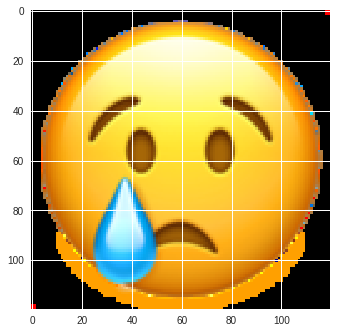

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

happy_emoji = cv.imread('saddness.png')
happy = cv.cvtColor(happy_emoji, cv.COLOR_BGR2RGB)
plt.imshow(happy)

def overlay_images(image_A, image_B, x, y):
    """
    Overlays image B on A.
    
    Based on: 
    https://docs.opencv.org/3.2.0/d0/d86/tutorial_py_image_arithmetics.html
    """
    
    # Let's create our ROI:
    rows, cols, channels = image_B.shape
    roi = image_A[y:y+rows, x:x+cols]
    
    # Now create a mask of image B and create its inverse mask also:
    B2gray = cv2.cvtColor(image_B, cv2.COLOR_BGR2GRAY)
    ret, mask = cv2.threshold(B2gray, 15, 255, cv2.THRESH_BINARY)
    mask_inv = cv2.bitwise_not(mask)
    
    # Now black-out the area of logo in ROI,
    # and take only region of logo from logo image:
    A_bg = cv2.bitwise_and(roi, roi, mask=mask_inv)
    B_fg = cv2.bitwise_and(image_B, image_B, mask=mask)
    
    # Put logo in ROI and modify the main image:
    dst = cv2.add(A_bg, B_fg)
    out = image_A.copy()
    out[y:y+rows, x:x+cols ] = dst
    
    return out

# Procesamiento principal (_a.k.a. nuestro main_)

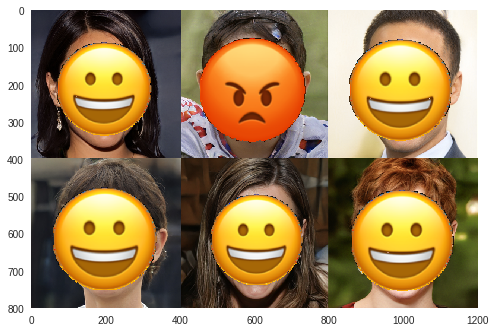

In [0]:


face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
classes = ['anger', 'fear', 'happiness', 'neutral', 'saddness', 'surprise']

img = cv2.imread('faces.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
for (x,y,w,h) in faces:
    # cv2.rectangle(img,(x,y),(x+w,y+h),(0,0,255),2)
    roi_color = img[y:y+h, x:x+w]
    new_roi = cv2.resize(roi_color, (48, 48))
    new_roi = np.expand_dims(new_roi, axis=0)
    prediction = loaded_model.predict(new_roi)
    pred_id = np.argmax(prediction)
    emoji = cv2.imread('{}.png'.format(classes[pred_id]))
    emoji = cv2.resize(emoji, (h, w))
    #img = overlay_images(img, emoji, x, y)
    for i in range(h):
        for j in range(w):
            if (emoji[i, j] != np.array([0, 0, 0])).all():
                img[y+i, x+j] = emoji[i, j]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.grid(False)